Acknowledgements

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

# US - Accidents Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Data/US_Accidents_May19.csv')

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
#Let's take a look at the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [5]:
#Where were the data collected from?
df['Source'].value_counts()

MapQuest         1702565
Bing              516762
MapQuest-Bing      24612
Name: Source, dtype: int64

In [6]:
sns.set_style('whitegrid')
sns.set_palette('Spectral')

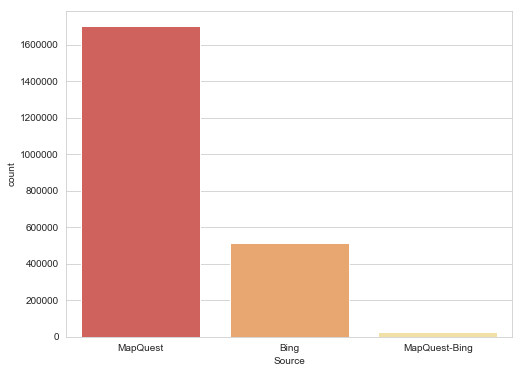

In [7]:
plt.figure(figsize = (8, 6))
sns.countplot(df['Source'], order = df['Source'].value_counts().index)

MapQuest stands out as the major source of this accident data

In [8]:
#Let's check any missing data
df.isna().sum()

ID                             0
Source                         0
TMC                       516762
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1727177
End_Lng                  1727177
Distance(mi)                   0
Description                    1
Number                   1458402
Street                         0
Side                           0
City                          68
County                         0
State                          0
Zipcode                      646
Country                        0
Timezone                    2141
Airport_Code               23664
Weather_Timestamp          47170
Temperature(F)             62265
Wind_Chill(F)            1852370
Humidity(%)                64467
Pressure(in)               57280
Visibility(mi)             71360
Wind_Direction             47190
Wind_Speed(mph)           442954
Precipitat

Some columns are perfect while others have some missing data, we can deal with the missing data later

In [9]:
#TMC provides more detailed event code
#df['TMC'].value_counts()
#after looking at https://wiki.openstreetmap.org/wiki/TMC/Event_Code_List, I do not think those details would add much value
#for this analysis, I would drop the column here
df.drop('TMC', axis = 1, inplace = True)

In [10]:
df['Severity'].value_counts()

2    1455524
3     715582
4      72002
1        814
0         17
Name: Severity, dtype: int64

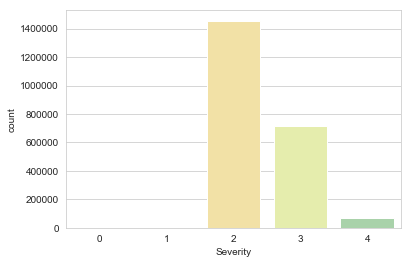

In [11]:
sns.countplot(df['Severity'])

Apparently Severity 2 has the most instances, that fits our expectation that most accidents' severities are in the middle

In [12]:
#Let's look at Start and End time for a sec
df[['Start_Time', 'End_Time']].head()

,Start_Time,End_Time
0,2016-02-08 05:46:00,2016-02-08 11:00:00
1,2016-02-08 06:07:59,2016-02-08 06:37:59
2,2016-02-08 06:49:27,2016-02-08 07:19:27
3,2016-02-08 07:23:34,2016-02-08 07:53:34
4,2016-02-08 07:39:07,2016-02-08 08:09:07


In [13]:
from datetime import datetime

In [14]:
#The times are pretty close, we might be interested to see the time difference between End_Time and Start_Time
time_diff = \
df['End_Time'].apply(datetime.strptime, args = ('%Y-%m-%d %H:%M:%S',)) - \
df['Start_Time'].apply(datetime.strptime, args = ('%Y-%m-%d %H:%M:%S',))

In [15]:
#Convert everything to hour difference, ignoring microseconds
time_diff_hr = time_diff.apply(lambda x: x.days * 24 + x.seconds / 3600)

In [16]:
time_diff_hr[:10]

0    5.233333
1    0.500000
2    0.500000
3    0.500000
4    0.500000
5    0.500000
6    0.500000
7    0.500000
8    0.500000
9    0.500000
dtype: float64

In [17]:
#Add time_diff_hr back to df as Time_Diff
df['Time_Diff'] = time_diff_hr

Another use of time is that we can divide time into different buckets, ex. Morning, Afternoon, Evening; because we have Start_Time and End_Time, I just use the Start_Time

In [18]:
start_hour = df['Start_Time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)

In [19]:
morning = [1 if 6 <= x <= 11 else 0 for x in start_hour]
afternoon = [1 if 12 <= x <= 17 else 0 for x in start_hour]
evening = [1 if 18 <= x <= 24 or 0 <= x <= 5 else 0 for x in start_hour]

In [20]:
#Now we put them back into df
df = df.assign(Morning = morning, Afternoon = afternoon, Evening = evening)

In [21]:
#We can drop the Start_Time and End_Time columns now
df.drop(['Start_Time', 'End_Time'], axis = 1, inplace = True)

In [100]:
#Now let's see accidents distribution by timeframe
temp = np.asarray(morning) + np.asarray(afternoon) * 2 + np.asarray(evening) * 3
timeframe = ['morning' if x == 1 else 'afternoon' if x == 2 else 'evening' for x in temp]
del temp

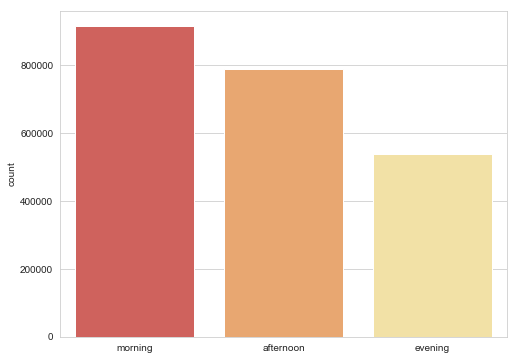

In [105]:
plt.figure(figsize = (8, 6))
sns.countplot(timeframe, order = ['morning', 'afternoon', 'evening'])
#It seems most accidents happen in the morning
#My initial thought is that evening times would have more accidents because of poor lighting but the plot shows otherwise

In [22]:
#Now view what columns we have again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 50 columns):
ID                       object
Source                   object
Severity                 int64
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction           object
Wind_Speed(mph)          float64
Precipitatio

In [23]:
#The next columns are Latitudes and Longitudes, it might be hard to use them directly, 
#but I am thinking about using K-means to group them into 10 geo-spacial areas

#Let's look at some sample data first
df[['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng']].head(10)

,Start_Lat,Start_Lng,End_Lat,End_Lng
0,39.865147,-84.058723,NaN,NaN
1,39.928059,-82.831184,NaN,NaN
2,39.063148,-84.032608,NaN,NaN
3,39.747753,-84.205582,NaN,NaN
4,39.627781,-84.188354,NaN,NaN
5,40.100590,-82.925194,NaN,NaN
6,39.758274,-84.230507,NaN,NaN
7,39.770382,-84.194901,NaN,NaN
8,39.778061,-84.172005,NaN,NaN
9,40.100590,-82.925194,NaN,NaN


In [24]:
#End_Lat and End_Lng have many missing values concurring with our earlier findings
#So we would drop End_Lat and End_Lng and only use Start_Lat and Start_Lng for K-means
#Actually, here, why not we just drop all the columns that have a lot of missing values altogether?
#Again, the missing value columns are
cols_missing_vals = df.isna().sum()[lambda x: x > 0]
cols_missing_vals

End_Lat                  1727177
End_Lng                  1727177
Description                    1
Number                   1458402
City                          68
Zipcode                      646
Timezone                    2141
Airport_Code               23664
Weather_Timestamp          47170
Temperature(F)             62265
Wind_Chill(F)            1852370
Humidity(%)                64467
Pressure(in)               57280
Visibility(mi)             71360
Wind_Direction             47190
Wind_Speed(mph)           442954
Precipitation(in)        1979466
Weather_Condition          72004
Sunrise_Sunset                78
Civil_Twilight                78
Nautical_Twilight             78
Astronomical_Twilight         78
dtype: int64

In [25]:
#The total # of rows of the df is
num_rows = len(df.index)
num_rows

2243939

In [26]:
#Let's say we do not want columns that is missing over 5% of the data
cols_to_drop = cols_missing_vals[lambda x: x > num_rows * 0.05]
cols_to_drop

End_Lat              1727177
End_Lng              1727177
Number               1458402
Wind_Chill(F)        1852370
Wind_Speed(mph)       442954
Precipitation(in)    1979466
dtype: int64

In [27]:
#Now drop the columns from df
df.drop(cols_to_drop.index, axis = 1, inplace = True)

In [28]:
#Now implement K-means to find 10 clusters
#reference on elbow method (not used here): https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
from sklearn.cluster import KMeans

In [31]:
X = df[['Start_Lat', 'Start_Lng']]
kmeans = KMeans(n_clusters = 10)
geo_cluster = kmeans.fit_predict(X)
df['Geo_Cluster'] = geo_cluster

In [53]:
#Now we can drop Start_Lat and Start_Lng
df.drop(['Start_Lat', 'Start_Lng'], axis = 1, inplace = True)

### Additional visualizations showing different data properties/relationships

What I am going to do next is to drop the features that we are not going to use in this analysis

In [67]:
df.drop(['Description', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Airport_Code', 'Weather_Timestamp', 
        'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis = 1, inplace = True)

In [68]:
#Lets see the columns that are left
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 29 columns):
ID                   object
Source               object
Severity             int64
Distance(mi)         float64
Timezone             object
Temperature(F)       float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction       object
Weather_Condition    object
Amenity              bool
Bump                 bool
Crossing             bool
Give_Way             bool
Junction             bool
No_Exit              bool
Railway              bool
Roundabout           bool
Station              bool
Stop                 bool
Traffic_Calming      bool
Traffic_Signal       bool
Turning_Loop         bool
Time_Diff            float64
Morning              int64
Afternoon            int64
Evening              int64
Geo_Cluster          int32
dtypes: bool(13), float64(6), int32(1), int64(4), object(5)
memory usage: 293.2+ MB


In [70]:
df.isna().sum()[lambda x: x > 0]

Timezone              2141
Temperature(F)       62265
Humidity(%)          64467
Pressure(in)         57280
Visibility(mi)       71360
Wind_Direction       47190
Weather_Condition    72004
dtype: int64

In [ ]:
#Visualizations
#Fill missing data
#Corr